In [1]:
import pyforest

In [2]:
df = pd.read_csv('housing.csv')
df.head()

<IPython.core.display.Javascript object>

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.shape

(20640, 10)

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

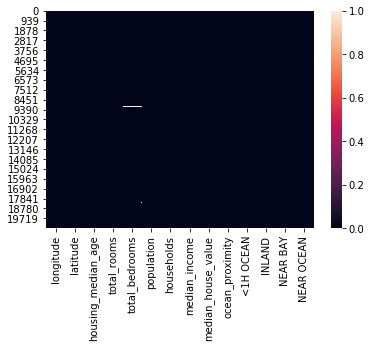

In [69]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

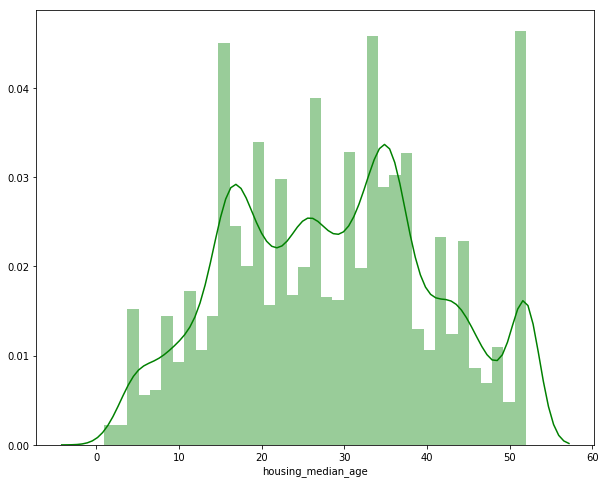

Housing median Age-MIN: 1.0
Housing median Age-MAX: 52.0


In [8]:
plt.figure(figsize=(10,8))
sns.distplot(df['housing_median_age'],color='g')
plt.show()
print('Housing median Age-MIN:',df['housing_median_age'].min())
print('Housing median Age-MAX:',df['housing_median_age'].max())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

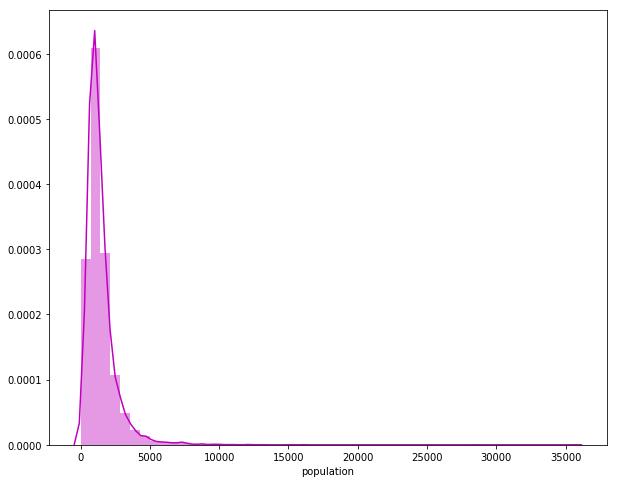

Population-min 3.0
Population-MAX 35682.0


In [9]:
plt.figure(figsize=(10,8))
sns.distplot(df['population'],color='m')
plt.show()
print('Population-min',df['population'].min())
print('Population-MAX',df['population'].max())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

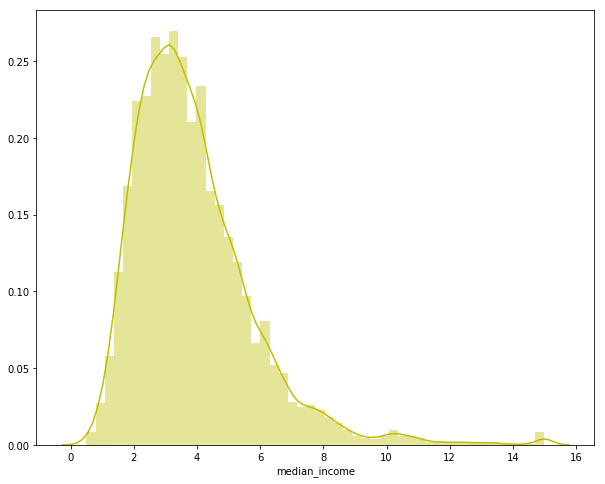

median_income-MIN: 0.4999
median_income-MAX: 15.0001


In [10]:
plt.figure(figsize=(10,8))
sns.distplot(df['median_income'],color='y')
plt.show()
print('median_income-MIN:',df['median_income'].min())
print('median_income-MAX:',df['median_income'].max())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

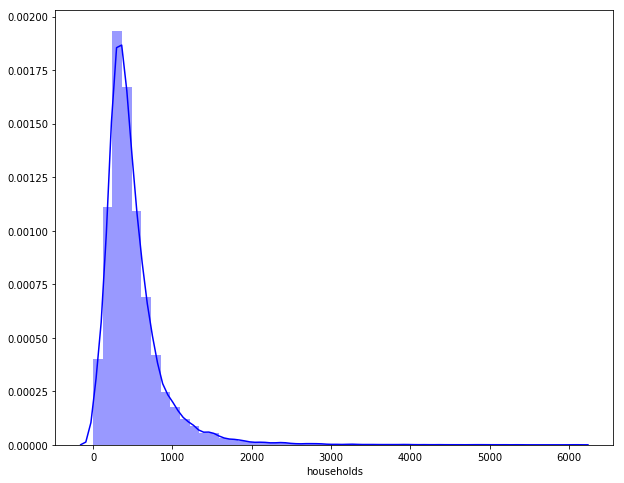

In [11]:
plt.figure(figsize=(10,8))
sns.distplot(df['households'],color='b')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

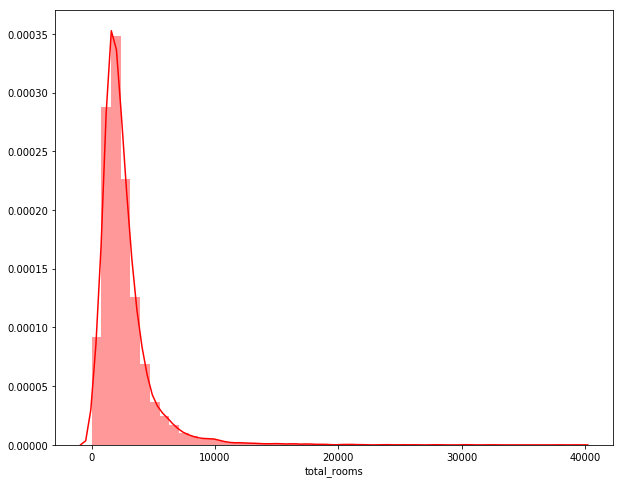

In [12]:
plt.figure(figsize=(10,8))
sns.distplot(df['total_rooms'],color='r')
plt.show()

<IPython.core.display.Javascript object>

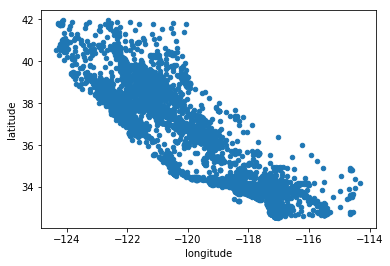

In [14]:
df.plot(kind='scatter',x='longitude',y='latitude')
plt.show()

<IPython.core.display.Javascript object>

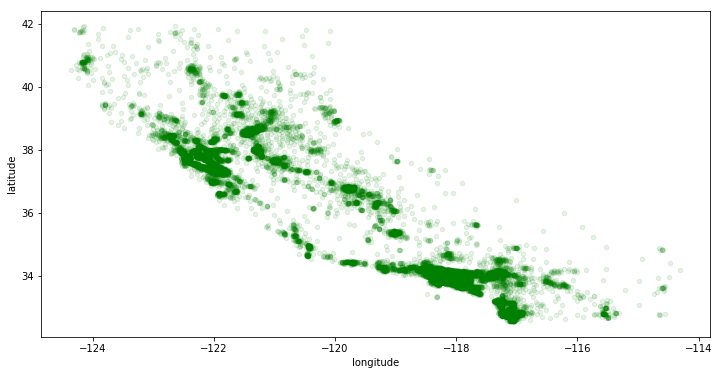

In [71]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,color='g',figsize=(12,6))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

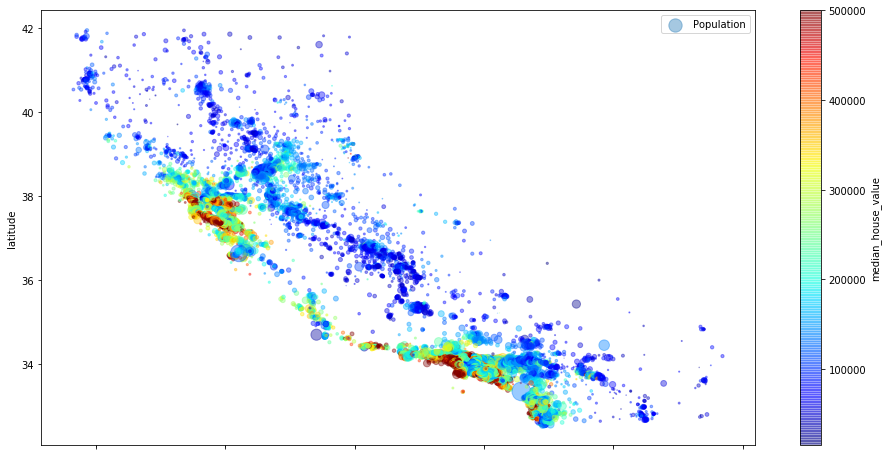

In [19]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
           s=df['population']/100,
           label='Population',
           c='median_house_value',
           cmap=plt.get_cmap('jet'),colorbar=True,figsize=(16,8)
          )
plt.legend()
plt.show()

# Corr

In [20]:
corr_matrix = df.corr()

In [21]:
corr_df = corr_matrix['median_house_value'].sort_values(ascending=False)
corr_df

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

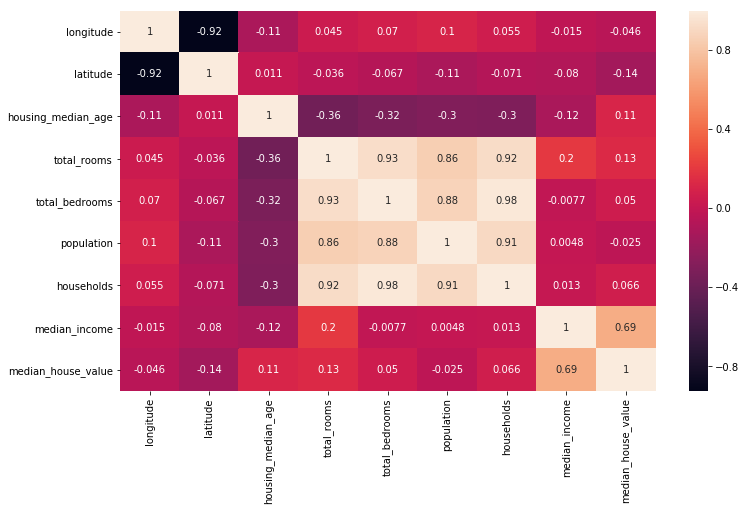

In [22]:
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix,annot=True)
plt.show()

<IPython.core.display.Javascript object>

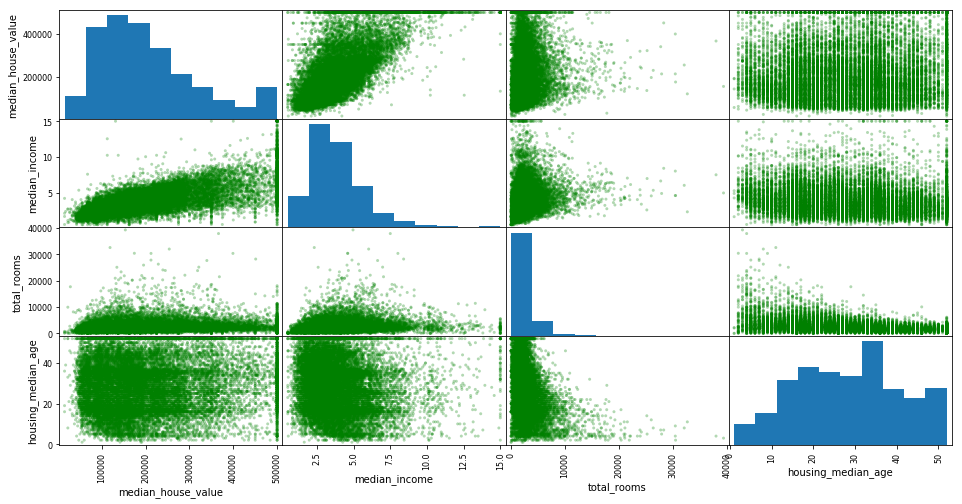

In [23]:
from pandas.plotting import scatter_matrix

attr = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[attr],figsize=(16,8),color='g',alpha=0.3)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1152x576 with 0 Axes>

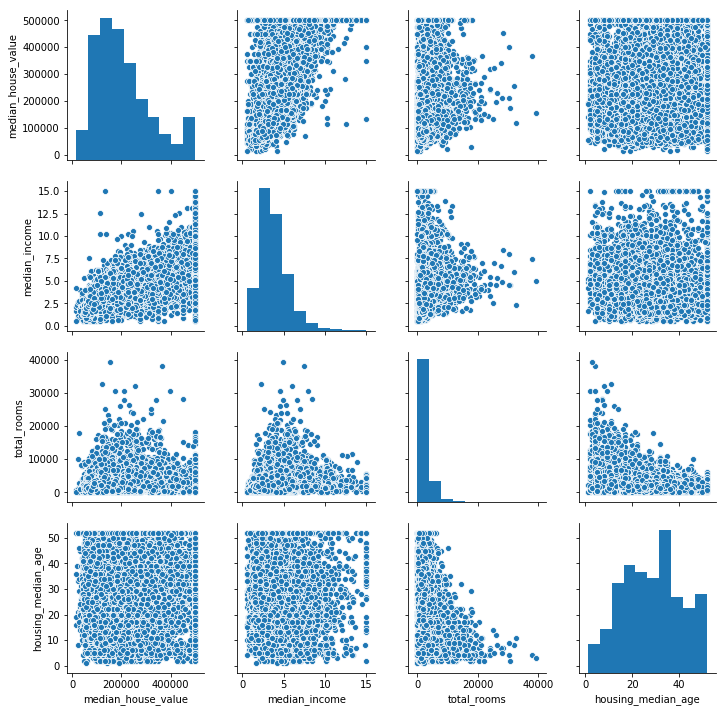

In [24]:
plt.figure(figsize=(16,8))
sns.pairplot(df[attr])
plt.show()

<IPython.core.display.Javascript object>

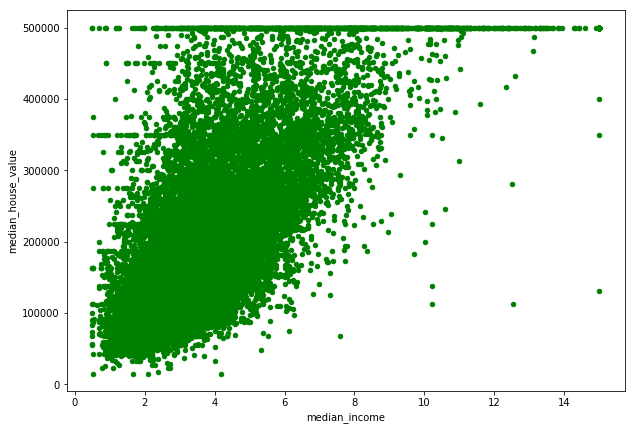

In [25]:
df.plot(kind='scatter',x='median_income',y='median_house_value',c='g',figsize=(10,7))
plt.show()

<li> <b>This is the perfect feature to predict house value

# Handle categorical variables

In [26]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [27]:
pd.get_dummies(df['ocean_proximity']).head(3)

<IPython.core.display.Javascript object>

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0


In [28]:
dummy = pd.get_dummies(df['ocean_proximity'])

<IPython.core.display.Javascript object>

In [29]:
dummy.drop('ISLAND',axis=1,inplace=True)

In [30]:
dummy.head(2)

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0


In [31]:
df.merge(dummy,left_index=True, right_index=True).isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [32]:
df['<1H OCEAN'] = dummy['<1H OCEAN'].values
df['INLAND'] = dummy['INLAND'].values
df['NEAR BAY'] = dummy['NEAR BAY'].values
df['NEAR OCEAN'] = dummy['NEAR OCEAN'].values

In [33]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0


## Fill null values

In [34]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [35]:
from sklearn.preprocessing import Imputer

In [36]:
train_ft = df.drop(['ocean_proximity','median_house_value'],axis=1)


In [37]:
imputer = Imputer(strategy='median')
imputer.fit(train_ft)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [38]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5348,    0.    ,    0.    ,    0.    ,    0.    ])

In [39]:
train_ft.median().values

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5348,    0.    ,    0.    ,    0.    ,    0.    ])

In [40]:
x = imputer.transform(train_ft)

In [41]:
train_new_set = pd.DataFrame(x,columns=train_ft.columns)
train_new_set.head(2)

<IPython.core.display.Javascript object>

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0


In [42]:
train_new_set.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [43]:
train_new_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0


In [44]:
train_new_set.shape

(20640, 12)

In [45]:
train_new_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
<1H OCEAN             20640 non-null float64
INLAND                20640 non-null float64
NEAR BAY              20640 non-null float64
NEAR OCEAN            20640 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


In [46]:
df.shape

(20640, 14)

In [47]:
train_new_set.shape

(20640, 12)

In [48]:
X = train_new_set.values
Y = df['median_house_value']

# Split the data

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2020)

In [51]:
x_train.shape

(16512, 12)

In [52]:
y_test.shape

(4128,)

In [53]:
x_test.shape

(4128, 12)

# Model -Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
predictions = lr.predict(x_test[:10])
predictions

array([238609.32131211, 381306.38850169, 257314.61040084, 131301.84992785,
       185894.87077418, 539843.34729246, 125404.98781123, 441654.60911985,
       160118.94728117, 201143.53254885])

In [57]:
y_train[:10]

14422    244400.0
13631     89200.0
18479    300800.0
5162      89700.0
3653     233700.0
6235     191700.0
8561     339700.0
6184     165700.0
1788      79400.0
17035    360500.0
Name: median_house_value, dtype: float64

In [59]:
data = {'Predicted':predictions,'Actual':y_test[:10].values,'Diff':(predictions-y_train[:10].values)}
error_df = pd.DataFrame(data=data)
error_df

<IPython.core.display.Javascript object>

,Predicted,Actual,Diff
0,238609.321312,235000.0,-5790.678688
1,381306.388502,386800.0,292106.388502
2,257314.610401,286400.0,-43485.389599
3,131301.849928,120100.0,41601.849928
4,185894.870774,114200.0,-47805.129226
5,539843.347292,500001.0,348143.347292
6,125404.987811,68700.0,-214295.012189
7,441654.609120,500001.0,275954.609120
8,160118.947281,134100.0,80718.947281
9,201143.532549,143000.0,-159356.467451


# Model evaluation

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [61]:
pred = lr.predict(x_test)


In [62]:
mse = mean_squared_error(y_test,pred)
np.sqrt(mse) #RMSE

<IPython.core.display.Javascript object>

69054.16722186214

In [63]:
mae = mean_absolute_error(y_test,pred)
mae

49951.601940544686

In [64]:
r2 = r2_score(y_test,pred)
r2

0.6480496434632262

# Train

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
scores = cross_val_score(lr,x_train,y_train,scoring="neg_mean_squared_error",cv=7)
rmse_Score = np.sqrt(-scores)

<IPython.core.display.Javascript object>

In [67]:
rmse_Score

array([72621.79441242, 67242.31772911, 68660.20243882, 72185.38018967,
       69007.11068751, 65440.27422308, 66543.76483304])

In [68]:
rmse_Score.mean()

68814.4063590913

# Can we optimize this model..?